In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from keras.datasets import mnist
from sklearn.cluster import MiniBatchKMeans
import statistics

In [22]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

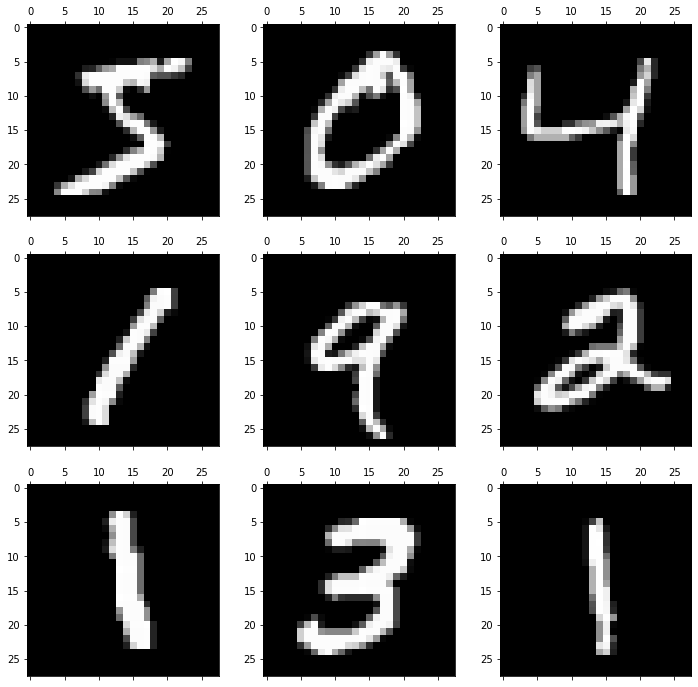

In [23]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(X_train[i])

In [24]:
X_train = X_train.reshape(len(X_train),-1)
Y_train = Y_train
X_train = X_train.astype(float)/255

In [25]:
n_digits = len(np.unique(Y_test))
kmeans = MiniBatchKMeans(n_clusters=n_digits).fit(X_train)

In [67]:
kmeans.n_clusters

10

In [40]:
#COPIED:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))

    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
  # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(kmeans, Y_train)
X_clusters = kmeans.predict(X_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y_train[:20])

[0 0 4 8 7 6 1 0 1 5 3 5 3 6 1 7 6 8 1 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [73]:
indexes = []
for i in range(kmeans.n_clusters):
    index = np.where(kmeans.labels_ == i)
    indexes.append(index)
list(indexes)

[(array([    6,     8,    14, ..., 59891, 59930, 59997], dtype=int64),),
 (array([    2,    20,    38, ..., 59765, 59771, 59817], dtype=int64),),
 (array([    4,    15,    19, ..., 59977, 59990, 59992], dtype=int64),),
 (array([    5,    13,    16, ..., 59976, 59981, 59985], dtype=int64),),
 (array([    0,     1,     7, ..., 59980, 59987, 59996], dtype=int64),),
 (array([   10,    12,    25, ..., 59914, 59955, 59978], dtype=int64),),
 (array([    3,    17,    23, ..., 59984, 59989, 59995], dtype=int64),),
 (array([   21,    51,    56, ..., 59840, 59869, 59878], dtype=int64),),
 (array([    9,    11,    24, ..., 59993, 59998, 59999], dtype=int64),),
 (array([   40,    53,    59, ..., 59958, 59979, 59994], dtype=int64),)]

In [78]:
probable_labels = []
for j in range(len(indexes)):
    probable_labels.append(Y_train[indexes[j]])
list(probable_labels)

[array([1, 1, 1, ..., 3, 3, 5], dtype=uint8),
 array([4, 4, 7, ..., 9, 9, 9], dtype=uint8),
 array([9, 7, 9, ..., 7, 9, 9], dtype=uint8),
 array([2, 6, 2, ..., 6, 6, 2], dtype=uint8),
 array([5, 0, 3, ..., 3, 0, 3], dtype=uint8),
 array([3, 3, 2, ..., 3, 3, 3], dtype=uint8),
 array([1, 8, 1, ..., 1, 8, 8], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([4, 5, 1, ..., 5, 6, 8], dtype=uint8),
 array([1, 4, 1, ..., 1, 1, 1], dtype=uint8)]

In [80]:
most_common_label = []
for j in range(len(probable_labels)):
    most_common_label.append(statistics.mode(probable_labels[j]))
most_common_label

[1, 4, 7, 6, 0, 3, 8, 0, 5, 1]